In [ ]:
from google.colab import files
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace '/content/drive/My Drive/Database.zip' with the actual path to your zip file in Google Drive
!cp '/content/drive/My Drive/Database.zip' .

!unzip Database.zip -d ./  # Extract the 'Database' folder to the current directory

# Step 3: Check the extracted files
print("Extracted files:", os.listdir('./Database'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  Database.zip
   creating: ./Database/
  inflating: ./__MACOSX/._Database   
  inflating: ./Database/Label.txt    
  inflating: ./__MACOSX/Database/._Label.txt  
  inflating: ./Database/.DS_Store    
  inflating: ./__MACOSX/Database/._.DS_Store  
   creating: ./Database/Image/
  inflating: ./__MACOSX/Database/._Image  
  inflating: ./Database/Image/6_P0_R30_00054.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P0_R30_00054.jpg  
  inflating: ./Database/Image/6_P10_R20_00027.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P10_R20_00027.jpg  
  inflating: ./Database/Image/6_P10_R20_00033.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P10_R20_00033.jpg  
  inflating: ./Database/Image/6_P0_R30_00040.jpg  
  inflating: ./__MACOSX/Database/Image/._6_P0_R30_00040.jpg  
  inflating: ./Database/Image/6_P20_R50_00022.jpg  
  inflating: ./__MACOSX/Database/

In [ ]:
label_path = '/content/Database/Label.txt'
image_folder = '/content/Database/Image'

# map the images with the label.txt
labels = pd.read_csv(label_path,
                     delimiter=' ',
                     header=None,
                     names=['Image', 'Pitch', 'Roll', 'Depth'])

print("First and last few rows of the labels:")
print(labels.head())
print(labels.tail())

First and last few rows of the labels:
               Image  Pitch  Roll     Depth
0  6_P0_R0_00001.jpg      0     0  0.611818
1  6_P0_R0_00002.jpg      0     0  0.693017
2  6_P0_R0_00003.jpg      0     0  0.457814
3  6_P0_R0_00004.jpg      0     0  0.105780
4  6_P0_R0_00005.jpg      0     0  0.296676
                    Image  Pitch  Roll     Depth
2011  6_P70_R70_00052.jpg     70    70  0.003353
2012  6_P70_R70_00053.jpg     70    70  0.958107
2013  6_P70_R70_00054.jpg     70    70  0.016327
2014  6_P70_R70_00055.jpg     70    70  0.000000
2015  6_P70_R70_00056.jpg     70    70  0.214759


In [ ]:
images = {}

# Loop through image filenames in Label.txt and load them
for img_name in labels['Image']:
    img_path = os.path.join(image_folder, img_name)
    try:
        images[img_name] = Image.open(img_path)  # Open the image
    except FileNotFoundError:
        print(f"Warning: {img_name} not found in {image_folder}")

In [ ]:
# Check for missing files
missing_files = []
for img_name in labels['Image']:
    img_path = os.path.join(image_folder, img_name)
    if not os.path.exists(img_path):
        missing_files.append(img_name)

if missing_files:
    print(f"Missing files: {len(missing_files)}")
    print(missing_files[:10])  # Display the first few missing files
else:
    print("All image files are present.")

# Check for duplicate labels
duplicate_labels = labels[labels.duplicated()]
if not duplicate_labels.empty:
    print(f"Duplicate labels found: {len(duplicate_labels)}")
    print(duplicate_labels)
else:
    print("No duplicate labels found.")

All image files are present.
No duplicate labels found.


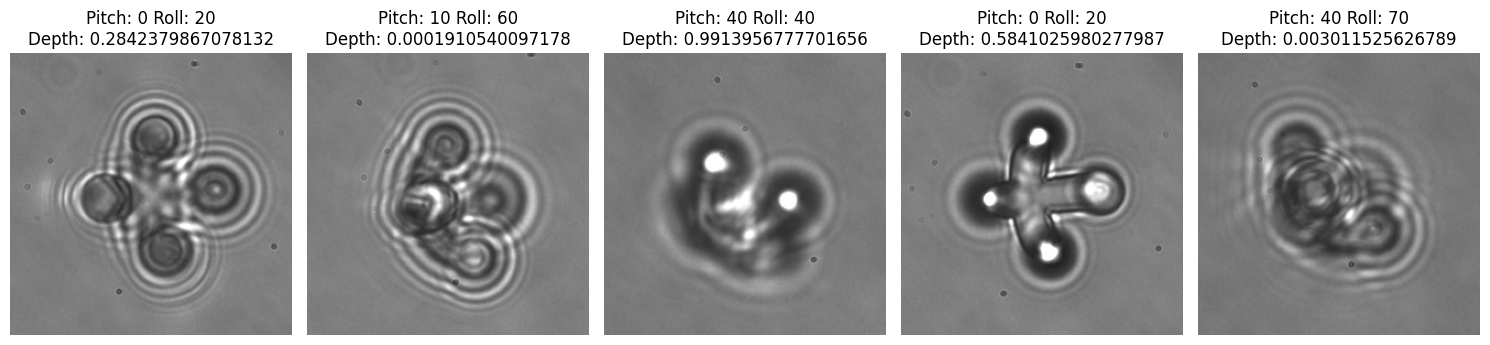

In [ ]:
import random

# Randomly select 5 samples from the dataset
random_samples = labels.sample(5)

# Displaying random sample images with their labels
plt.figure(figsize=(15, 5))

for i, (_, row) in enumerate(random_samples.iterrows()):
    sample_image_path = row['Image']
    sample_pitch = row['Pitch']
    sample_roll = row['Roll']
    sample_depth = row['Depth']

    sample_image_path = os.path.join(image_folder, sample_image_path)

    image = Image.open(sample_image_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pitch: {sample_pitch} Roll: {sample_roll}\nDepth: {sample_depth}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics for Pitch, Roll, and Depth
print("Pitch Angle Statistics:")
print(labels['Pitch'].describe())

print("\nRoll Statistics:")
print(labels['Roll'].describe())

print("\nDepth Statistics:")
print(labels['Depth'].describe())

Pitch Angle Statistics:
count    2016.000000
mean       23.333333
std        19.725159
min         0.000000
25%        10.000000
50%        20.000000
75%        40.000000
max        70.000000
Name: Pitch, dtype: float64

Roll Statistics:
count    2016.000000
mean       46.666667
std        19.725159
min         0.000000
25%        30.000000
50%        50.000000
75%        60.000000
max        70.000000
Name: Roll, dtype: float64

Depth Statistics:
count    2016.000000
mean        0.506819
std         0.341972
min         0.000000
25%         0.182680
50%         0.508271
75%         0.839793
max         1.000000
Name: Depth, dtype: float64


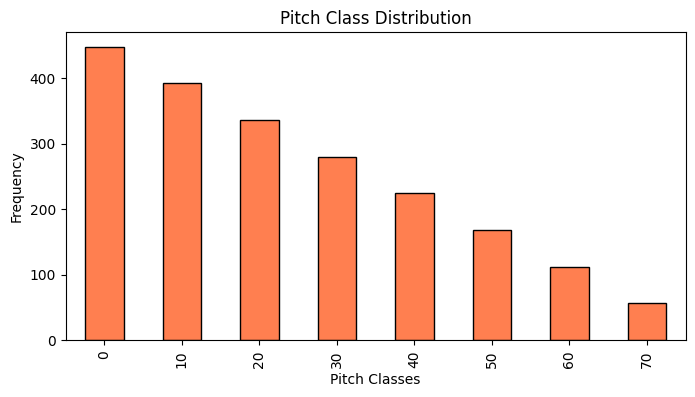

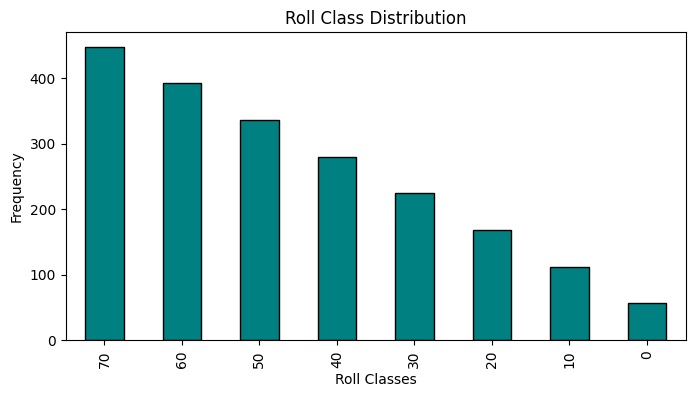

In [ ]:
# Pitch distribution
plt.figure(figsize=(8, 4))
labels['Pitch'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Pitch Classes')
plt.ylabel('Frequency')
plt.title('Pitch Class Distribution')
plt.show()

# Roll distribution
plt.figure(figsize=(8, 4))
labels['Roll'].value_counts().plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel('Roll Classes')
plt.ylabel('Frequency')
plt.title('Roll Class Distribution')
plt.show()

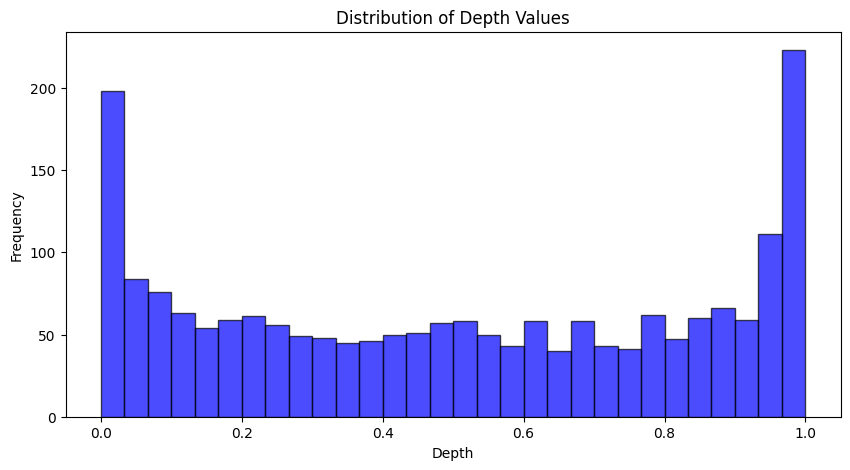

In [ ]:
#Depth distribution
plt.figure(figsize=(10, 5))
plt.hist(labels['Depth'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Depth Values')
plt.show()

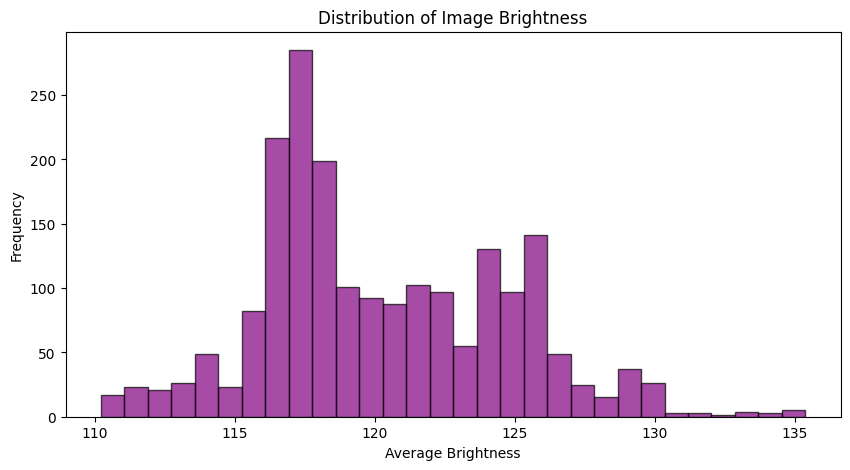

In [ ]:
# brightness distribution

brightness = []
for img_name, img in images.items():
    img_array = np.array(img)  # Convert to NumPy array
    brightness.append(img_array.mean())  # Compute mean pixel value

# Plot brightness distribution
plt.figure(figsize=(10, 5))
plt.hist(brightness, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Average Brightness')
plt.ylabel('Frequency')
plt.title('Distribution of Image Brightness')
plt.show()

In [ ]:
image_shapes = []
for img_name, img in images.items():
    image_shapes.append(img.size)  # (width, height)

# Convert to DataFrame for analysis
import pandas as pd
image_shapes_df = pd.DataFrame(image_shapes, columns=['Width', 'Height'])

# Display common image dimensions
print("Most common image dimensions:")
print(image_shapes_df.value_counts().head())

Most common image dimensions:
Width  Height
256    256       2016
Name: count, dtype: int64


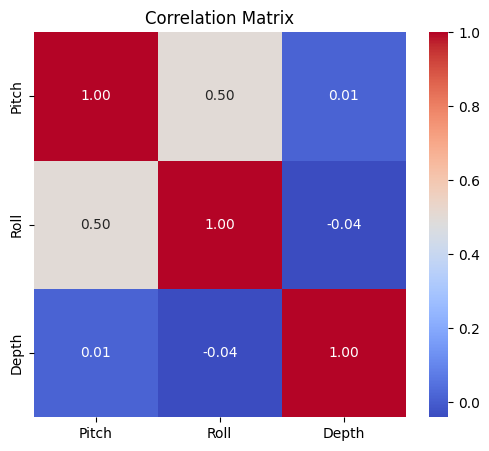

In [ ]:
# correlation matrix
correlations = labels[['Pitch', 'Roll', 'Depth']].corr()

import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

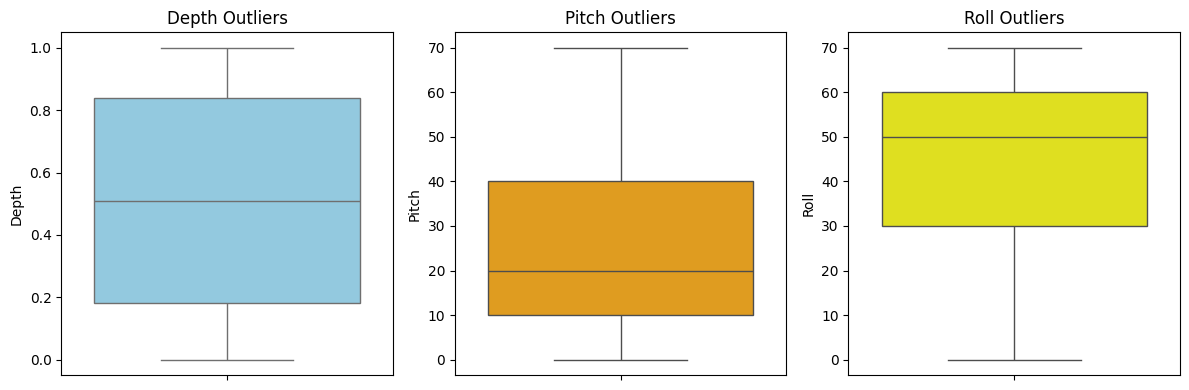

In [ ]:
plt.figure(figsize=(12, 4))

# Boxplot for Depth
plt.subplot(1, 3, 1)
sns.boxplot(y=labels['Depth'], color='skyblue')
plt.title('Depth Outliers')

# Boxplot for pitch
plt.subplot(1, 3, 2)
sns.boxplot(y=labels['Pitch'], color='orange')
plt.title('Pitch Outliers')

# Boxplot for roll
plt.subplot(1, 3, 3)
sns.boxplot(y=labels['Roll'], color='yellow')
plt.title('Roll Outliers')

plt.tight_layout()
plt.show()